# Проект: Статистический анализ данных

**Описание и цели проекта**

Популярный сервис аренды самокато Go Fast передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

- *без подписки*
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;

- *с подпиской Ultra*
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.
 
 
В основных данных есть информация о пользователях, их поездках и подписках.

- Пользователи — `users_go.csv`


*user_id*	- уникальный идентификатор пользователя

*name*	- имя пользователя

*age*	- возраст

*city*	- город

*subscription_type* -	тип подписки (free, ultra)


- Поездки — `rides_go.csv`

*user_id*	- уникальный идентификатор пользователя

*distance*	- расстояние, которое пользователь проехал в текущей сессии (в метрах)

*duration*	- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

*date*	- дата совершения поездки

- Подписки — `subscriptions_go.csv`

*subscription_type*	- тип подписки

*minute_price*	- стоимость одной минуты поездки по данной подписке

*start_ride_price*	- стоимость начала поездки

*subscription_fee* -стоимость ежемесячного платежа

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#считываем файлы
users = pd.read_csv('/datasets/users_go.csv')
users.head(10)


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


На первый взгляд видим, что пользователи молодые или среднего возраста и из разных городов. Идем дальше.

In [3]:
rides = pd.read_csv('/datasets/rides_go.csv')
rides.head(10)


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Один и тот же юзер в разные месяцы пользовался сервисом и в среднем проходил расстояния примерно 2000-3000 метров. По продолжительности ездил недолго

In [4]:
#смотрим виды подписок и тарифы
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Есть тарифы без подписки и с подпиской. Выгода есть при долгих или частых поезках

## Предобработка данных

In [5]:
#смотрим, какие типы данных в датафрейме
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
#приводим столбец к типу даты
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
#добавляем новый столбец с номерами месяцев
rides['month'] = rides['date'].dt.month
rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [8]:
#ищем пустые значения
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [11]:
#ищем дубликаты
users.duplicated().sum()


31

In [12]:
#удаляем дубликаты, так как они не нужны
users = users.drop_duplicates()
users.duplicated().sum()

0

In [13]:
#проверяем
rides.duplicated().sum()


0

## Исследовательский анализ данных

In [14]:
#наиболее часто встречаемые города
city_counts = users['city'].value_counts()
city_counts


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

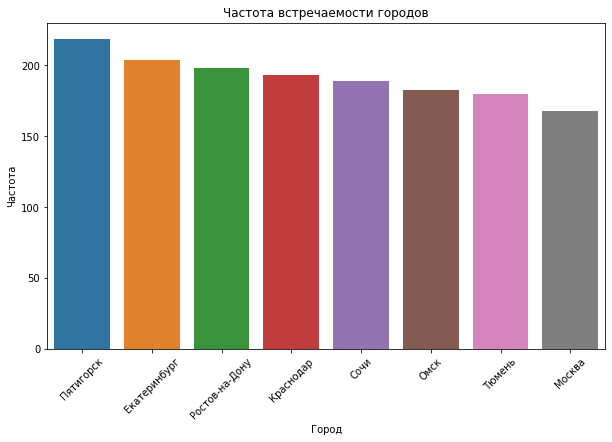

In [15]:
#построим график для большей наглядности

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

Пятигорск встречается чаще всего, а самое меньшее количество поездок в Москве

In [16]:
#соотношение юзеров с подпиской и без подписки

subscriptions_counts = users['subscription_type'].value_counts()
subscriptions_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

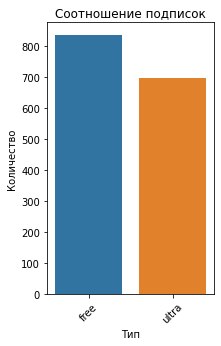

In [17]:
#смотрим соотошение подписок для наглядности

plt.figure(figsize=(3, 5))
sns.barplot(x=subscriptions_counts.index, y=subscriptions_counts.values)
plt.title('Соотношение подписок')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Юзеров без подписки оказалось больше на 16%. Думаю, связано с быстрой доступностью самокатов без подписки. Возможно, подключение подписки занимает определенное время, а пользователи хотят ехать здесь и сейчас

In [18]:
#возраст юзеров
users_age = users['age'].value_counts()
users_age


25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

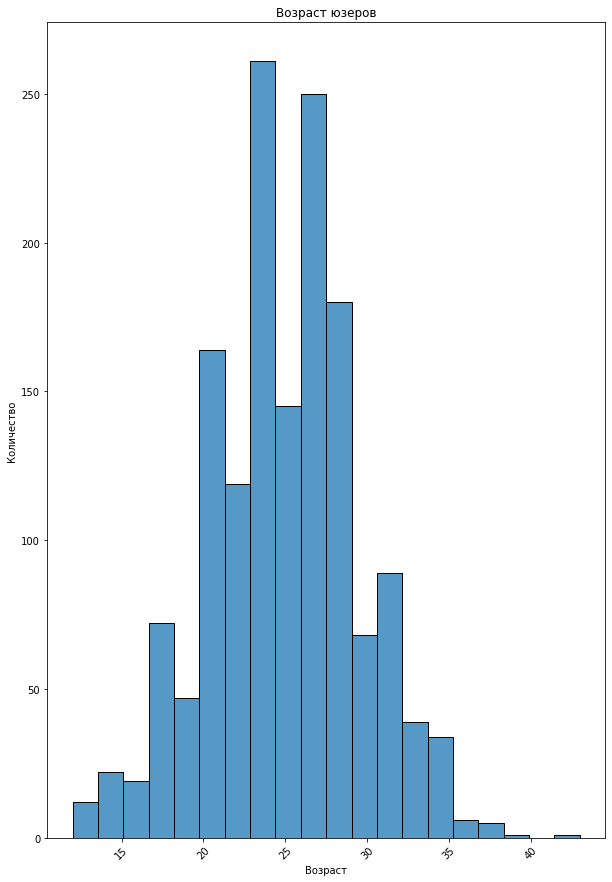

In [19]:
#смотрим в графике возраст 
plt.figure(figsize=(10, 15))
sns.histplot(users['age'], bins=20)
plt.title('Возраст юзеров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Средний возраст: 25. Активно пользуются люди от 20-25 лет

Также есть довольно юные юзеры. Проверим их.

In [20]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Самому юному пользователю 12 лет. В возрасте от 7 до 14 лет на СИМ можно ездить по пешеходным и велосипедным дорожкам, тротуарам и в пределах пешеходных зон.

На рассмотрении вопрос об увеличении минимального возраста для пользователей самокатов (с 16 лет).
Думаю, было бы славно, ведь самокаты считаются травмоопасным транспортом.


In [21]:
#среднее пройденное расстояние
rides['distance'].mean()

3070.6599756818814

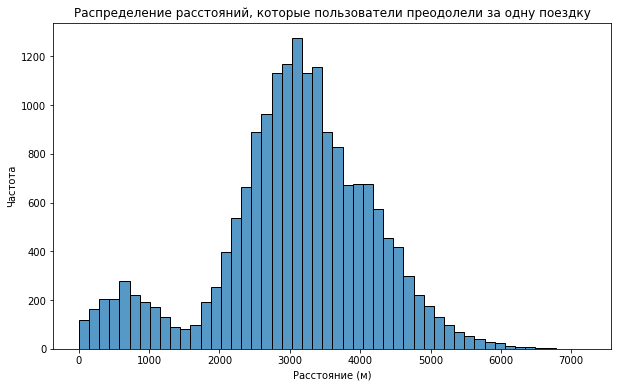

In [22]:
#смотрим в графике
plt.figure(figsize=(10, 6))
sns.histplot(rides['distance'], bins=50)
plt.title('Распределение расстояний, которые пользователи преодолели за одну поездку')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.show()

Среднее расстояние, которое юзер преодолел за одну поезду примерно 3000 м. Самокаты скорее всего чаще использовались в развлекательных целях, коротких прогулках. 

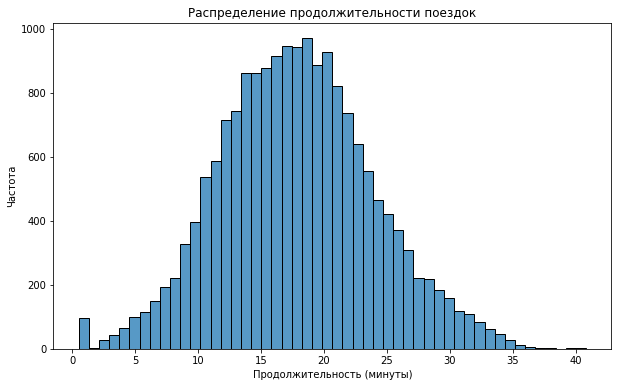

In [23]:
#смотрим продолжительность поездок
plt.figure(figsize=(10, 6))
sns.histplot(rides['duration'], bins=50)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Частота')
plt.show()

В среднем примерно 20 минут. Оптимальное время, если нужно добраться до места назначения быстро или просто прогуляться.

Есть аномальные значения до 1 минуты. Посмотрим, короткие ли это поездки или сбои

In [24]:
rides['duration'].value_counts()

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
             ..
18.843765     1
17.644888     1
22.477965     1
19.745218     1
16.537044     1
Name: duration, Length: 17974, dtype: int64

95 значений с одной и той же продолжительностью в 30 секунд. Вряд ли это короткие поездки, так как ровно уложиться столько раз не получится.
Думаю, можно удалить эти аномалии

In [25]:
#смотрим минимальное значение в датафрейме
rides['duration'].min()

0.5

In [26]:
#удаляем значения меньше 0.5, проверяем 
rides = rides[rides['duration'] > 0.5]
rides['duration'].min()

2.0356324681963884

##  Объединение данных

In [27]:
#объединяем данные о пользователях, поездках, ключ по user_id
users_rides = pd.merge(users, rides, on='user_id', how='inner')
users_rides


,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [28]:
#объединяем предыдущий датафрейм с инфо о подписках
merged_data = pd.merge(users_rides, subscriptions, on='subscription_type', how='inner')
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
#проверяем, не возникли ли пропуски
merged_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [30]:
#проверяем размер, соответсвует ли ожиданиям 
expected_size = len(merged_data)
expected_size

17973

In [31]:
#сколько всего юзеров с подпиской и без
merged_data['subscription_type'].value_counts()

free     11473
ultra     6500
Name: subscription_type, dtype: int64

In [32]:
#создаем датафрейм с данными о юзерах с подпиской
users_ultra = merged_data[merged_data['subscription_type'] == 'ultra']
users_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [33]:
#и без подписки
users_free = merged_data[merged_data['subscription_type'] == 'free']
users_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


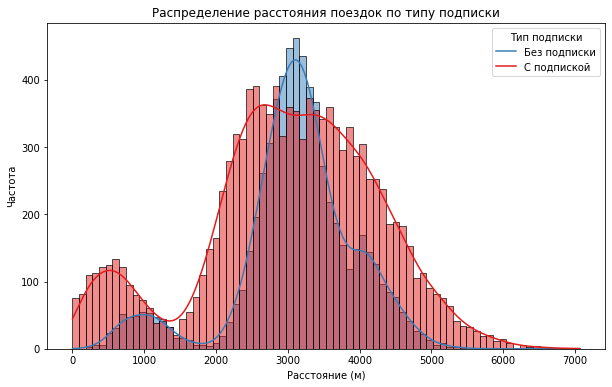

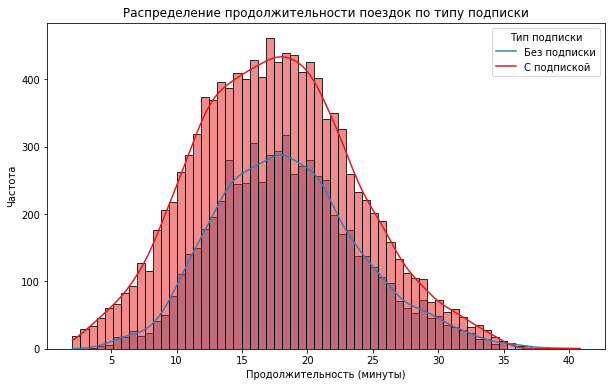

In [34]:
#строим гистограммы для инфо о расстоянии поездки для юзеров обоих категорий
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='distance', hue='subscription_type', hue_order=['free', 'ultra'], kde=True, palette='Set1')
plt.title('Распределение расстояния поездок по типу подписки')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.legend(title='Тип подписки', labels=['Без подписки', 'С подпиской'])
plt.show()

#для продолжительности поездок
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='duration', hue='subscription_type', hue_order=['free', 'ultra'], kde=True, palette='Set1')
plt.title('Распределение продолжительности поездок по типу подписки')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Частота')
plt.legend(title='Тип подписки', labels=['Без подписки', 'С подпиской'])
plt.show()

Юзеры без подписки преодолевают большее расстояние в среднем, чем с подпиской. Но юзеры с подпиской стабильнее ездят в примерно одни и те же расстояния, т.к. распределение получилось более плавным. 

По продолжительности поездок люди с подпиской чаще ездят. Возможно, из-за выгодных условий по времени. И вообще, думаю, подписки "обязывают" ездить чаще.

## Подсчёт выручки

In [35]:
#округляем для подсчета стоимости до следующего целого числа
merged_data['duration'] = np.ceil(merged_data['duration']).astype(int)
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [36]:
#найдем суммарное расстояние, количество поездок и суммарное время для каждого юзера за каждый месяц
aggregated = merged_data.groupby(['user_id', 'month', 'subscription_type']).agg(
    total_distance=('distance', 'sum'),
    total_trips=('distance', 'count'),
    total_duration=('duration', 'sum')
).reset_index()
aggregated


,user_id,month,subscription_type,total_distance,total_trips,total_duration
0,1,1,ultra,7027.511294,2,42
1,1,4,ultra,754.159807,1,7
2,1,8,ultra,6723.470560,2,46
3,1,10,ultra,5809.911100,2,32
4,1,11,ultra,7003.499363,3,56
...,...,...,...,...,...,...
11295,1534,6,free,3409.468534,2,26
11296,1534,8,free,7622.453034,2,48
11297,1534,9,free,4928.173852,1,23
11298,1534,11,free,13350.015305,4,78


In [37]:
#добаввляем столбец с помесячной выручкой, которую принес каждый юзер
aggregated['profit'] = (merged_data['start_ride_price'] * aggregated['total_trips'] + merged_data['minute_price'] * aggregated['total_duration'] + merged_data['subscription_fee'])
aggregated

,user_id,month,subscription_type,total_distance,total_trips,total_duration,profit
0,1,1,ultra,7027.511294,2,42,451.0
1,1,4,ultra,754.159807,1,7,241.0
2,1,8,ultra,6723.470560,2,46,475.0
3,1,10,ultra,5809.911100,2,32,391.0
4,1,11,ultra,7003.499363,3,56,535.0
...,...,...,...,...,...,...,...
11295,1534,6,free,3409.468534,2,26,308.0
11296,1534,8,free,7622.453034,2,48,484.0
11297,1534,9,free,4928.173852,1,23,234.0
11298,1534,11,free,13350.015305,4,78,824.0


In [38]:
#смотрим выручку юзеров с подпиской и без по месяцам
monthly_revenue = aggregated.pivot_table(index='month', columns='subscription_type', values='profit', aggfunc = 'sum')
monthly_revenue.columns = ['free', 'ultra']
monthly_revenue

,free,ultra
month,,
1,203593.0,144108.0
2,173477.0,124572.0
3,194113.0,142608.0
4,193294.0,137318.0
5,197182.0,149235.0
6,200527.0,143834.0
7,193257.0,143466.0
8,195404.0,138534.0
9,202552.0,129337.0


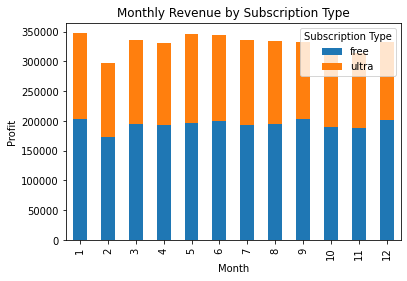

In [39]:
#визуализируем помесячную выручку

monthly_revenue.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Revenue by Subscription Type')
plt.legend(title='Subscription Type')

# Show the plot
plt.show()

Видно, что юзеры без подписки приносят больше выручки. Причинами для отказа от подписки могут быть:
1. Сезонность
2. Редкость использования
3. Сложность покупки подписки 
4. Недостаток информации о выгодности подписки
5. Высокая стоимость

и прочие причины, из-за которых подписок может быть меньше

## Проверка гипотез

**6.1** Нулевая гипотеза: средняя продолж-ть поездок юзеров с подпиской равна средней прод-ти поездок без подписки.

Альтернативная гипотеза: средняя продолжительность поездок для пользователей с подпиской больше, чем для пользователей без подписки

In [40]:
#вычисляем среднюю продолжительность

mean_duration_free = users_free['duration'].mean()
mean_duration_ultra = users_ultra['duration'].mean()

print(f"Средняя продолжительность поездок для пользователей с подпиской: {mean_duration_ultra}")
print(f"Средняя продолжительность поездок для пользователей без подписки: {mean_duration_free}")

results = st.ttest_ind( users_ultra['duration'], users_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Пользователи с подпиской тратят значимо больше времени на поездки.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимой разницы в продолжительности поездок между пользователями с подпиской и без подписки.")

Средняя продолжительность поездок для пользователей с подпиской: 18.54198516280583
Средняя продолжительность поездок для пользователей без подписки: 17.530771268800226
p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу: Пользователи с подпиской тратят значимо больше времени на поездки.


*Нулевая гипотеза отвергнута, так как p-value больше выбранному уровню статистической значимости. 
Юзеры с подпиской тратят больше времени*

**6.2** Нулевая гипотеза: среднее расстояние, которое проезжают юзеры с подпиской за одну поездку, равно 3130 метров.
    
Альтернативная гипотеза: среднее расстояние меньше 3130 метров.

In [41]:
value = 3130
alpha = 0.05

results = st.ttest_1samp(users_ultra['distance'], value, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отклоняем нулевую гипотезу")
else:
    print("Не отклоняем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает 3130 метров")

p-значение: 0.08046311521502146
Не отклоняем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает 3130 метров


**6.3** Нулевая гипотеза: помесячная выручка от юзеров с подпиской равна выручке от юзер без подписки.

Альтернативная гипотеза: помесячная выручка от юзеров с подпиской выше.

In [42]:
alpha = 0.05

results = st.ttest_ind(monthly_revenue['free'], monthly_revenue['ultra'], alternative='greater')
print('p-значение:', results.pvalue)



if results.pvalue < alpha:
     print("Отвергаем нулевую гипотезу: Есть значимая разница в выручке между подписчиками и неподписчиками.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимой разницы в выручке между подписчиками и неподписчиками.")


p-значение: 1.3949659707835752e-14
Отвергаем нулевую гипотезу: Есть значимая разница в выручке между подписчиками и неподписчиками.


**6.4**. Для проверки гипотезы о техподдержке, где нужно проверить количество обращений до и после обновления серверов, подойдет двухвыборочный t-тест для зависимых выборок (st.ttest_rel), так как мы проверяем изменения в парных данных. Этот способ поможет нам определить, действительно ли обновление серверов привело к уменьшению обращений в техподдержку, что может быть полезно для оценки эффективности обновления.  

# Общий вывод

Юзеров без подписки больше на 16%, чем с подпиской. Посчитав выручку по месяцам, пришли к выводу, что выручка от юзеров без подписки ощутимо больше. Причины для отказа могут быть сезонность, непонимание выгоды, для кого-то дорогая стоимость, нежелание быть привязанным к одному транспорту, наличие конкурентов, сформированные привычки и прочее. Также немаловажным фактором может являться случайный выбор, когда юзер хочет добраться до места быстро и недорого. 

Пользователи с подпиской тратят ездят чаще, возможно, потому что подписка может подразумевать привязанность к определенному транспортному средству.

Способы привлечения пользователей к покупке подписки:
1. Скидки и акции для новых подписчиков и программы лояльности
2. Информирование пользователей, рекламные кампании
3. Анализ конкурентов
4. Улучшение качества самокатов
5. Улучшение приложения, алгоритмов, техподдержки, простой понятный интерфейс
6. Персонализированные предложения

Эти способы могут повысить лояльность юзеров, чтобы в дальшейшем улучшать работу и показатели сервиса.
